# Проект: HR-аналитика

## Описание проекта

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.
Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 
Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли. 

**Цель исследования:** 
- Задача 1: построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 
- Задача 2: построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

### Задача 1: предсказание уровня удовлетворённости сотрудника

**Описание данных:**

- Тренировочная выборка: `train_job_satisfaction_rate.csv`
- Входные признаки тестовой выборки: `test_features.csv`
- Целевой признак тестовой выборки: `test_target_job_satisfaction_rate.csv`

Для задачи заказчик предоставил данные с признаками:
- `id` — уникальный идентификатор сотрудника;
- `dept` — отдел, в котором работает сотрудник;
- `level` — уровень занимаемой должности;
- `workload` — уровень загруженности сотрудника;
- `employment_years` — длительность работы в компании (в годах);
- `last_year_promo` — показывает, было ли повышение за последний год;
- `last_year_violations` — показывает, нарушал ли сотрудник трудовой договор за последний год;
- `supervisor_evaluation` — оценка качества работы сотрудника, которую дал руководитель;
- `salary` — ежемесячная зарплата сотрудника;
- `job_satisfaction_rate` — уровень удовлетворённости сотрудника работой в компании, целевой признак.


**Ход исследования:**

1. **Загрузка данных.**
2. **Предобработка данных.** Изучим данные и сделаем выводы. При необходимости выполним предобработку. Если есть пропуски, заполним их в пайплайне.
3. **Исследовательский анализ данных.** Исследуем все признаки и сделаем выводы о том, как их нужно подготовить.
4. **Подготовка данных.** Подготовку признаков выполним в пайплайне. При кодировании учитываем особенности признаков и моделей и используем как минимум два кодировщика.
5. **Обучение моделей.** Обучим как минимум две модели, среди которых будет одна линейная модель, а вторая — дерево решений. Подберем гиперпараметры как минимум для одной модели с помощью одного из известных вам инструментов. Выберем лучшую модель и проверим её качество. Выбор сделаем на основе новой метрики — SMAPE (англ. symmetric mean absolute percentage error, «симметричное среднее абсолютное процентное отклонение»). 
6. **Оформление выводов.** Сделаем промежуточные выводы о том, какая модель справилась лучше и почему.

### Задача 2: предсказание увольнения сотрудника из компании

**Описание данных:**
- Тренировочная выборка: `train_quit.csv`
- Входные признаки тестовой выборки: `test_features.csv`
- Целевой признак тестовой выборки: `test_target_quit.csv`

Для этой задачи будем использовать те же входные признаки, что и в предыдущей задаче. Однако целевой признак отличается: это `quit` — увольнение сотрудника из компании.


**Ход исследования:**
1. **Загрузка данных.**
2. **Предобработка данных.** Изучим данные и при необходимости выполним предобработку. Если есть пропуски, заполним их в пайплайне.
3. **Исследовательский анализ данных.** 
   - Проведем исследовательский анализ данных.
   - Составим портрет «уволившегося сотрудника». Например, можно узнать, в каком отделе с большей вероятностью работает уволившийся сотрудник и какой у него уровень загруженности. Также можно сравнить среднее значение зарплаты ушедших сотрудников с теми, кто остался в компании.
   - Аналитики утверждают, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Проверим это утверждение: визуализируем и сравним распределения признака `job_satisfaction_rate` для ушедших и оставшихся сотрудников. Используем данные с обоими целевыми признаками тестовой выборки.
4. **Добавление нового входного признака.** Допустим, `job_satisfaction_rate` и `quit` действительно связаны и мы получили необходимое значение метрики в первой задаче. Тогда добавим `job_satisfaction_rate`, предсказанный лучшей моделью первой задачи, к входным признакам второй задачи.
5. **Подготовка данных.** Подготовим признаки так же, как и в первой задаче: выполним подготовку в пайплайне, дополнив пайплайн предобработки. При кодировании учтем особенности признаков и моделей и используем как минимум два кодировщика.
6. **Обучение модели.** Обучим как минимум три модели. Как минимум для двух из них подберем гиперпараметры. Проверим качество лучшей модели. Метрика оценки качества в этой задаче — ROC-AUC. Критерий успеха: ROC-AUC ≥ 0.91 на тестовой выборке. Напомним: отбор признаков часто помогает улучшить метрику.
7. **Выводы.** Сделаем промежуточные выводы о том, какая модель справилась лучше и почему.


### Общий вывод
Сформулируем общий вывод: 
- опишем задачу;
- опишем все этапы работы;
- добавим выводы и дополнительные предложения для бизнеса.

## Задача 1: предсказание уровня удовлетворённости сотрудника

### Загрузка данных

Импортируем библиотеки.

In [1]:
#установим библиотеки
!pip install scikit-learn==1.4.0
!pip install shap 
!pip install phik -q

#стандартные библиотеки
import os
import pandas as pd 
import numpy as np
from scipy import stats as st

#библиотеки для построения графиков
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

import phik

#класс для разделения на выборки
from sklearn.model_selection import train_test_split 

#загружаем классы для подготовки данных
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

#загружаем класс pipeline
from sklearn.pipeline import Pipeline

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# загружаем функцию для работы с метриками
from sklearn.metrics import roc_auc_score, make_scorer

# импортируем класс RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# загружаем нужные модели
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR

from sklearn.metrics import confusion_matrix

import shap

#константы
RANDOM_STATE = 42
TEST_SIZE = 0.25

Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы.

In [2]:
pth1=['/Users/margarita/Desktop/datasets/train_job_satisfaction_rate.csv', 
      '/Users/margarita/Desktop/datasets/test_features.csv', 
      '/Users/margarita/Desktop/datasets/test_target_job_satisfaction_rate.csv']

pth2=['/datasets/train_job_satisfaction_rate.csv', 
      '/datasets/test_features.csv', 
      '/datasets/test_target_job_satisfaction_rate.csv']

if os.path.exists(pth1[0]):
    train_job_satisfaction_rate = pd.read_csv(pth1[0], sep=',')
elif os.path.exists(pth2[0]):
    train_job_satisfaction_rate = pd.read_csv(pth2[0], sep=',')
else:
    print('Something is wrong in train_job_satisfaction_rate')

if os.path.exists(pth1[1]):
    test_features = pd.read_csv(pth1[1], sep=',')
elif os.path.exists(pth2[1]):
    test_features = pd.read_csv(pth2[1], sep=',')
else:
    print('Something is wrong in test_features')

if os.path.exists(pth1[2]):
    test_target_job_satisfaction_rate = pd.read_csv(pth1[2], sep=',')
elif os.path.exists(pth2[2]):
    test_target_job_satisfaction_rate = pd.read_csv(pth2[2], sep=',')
else:
    print('Something is wrong in test_target_job_satisfaction_rate')

Выведем первые строки наборов данных. Изучим общую информацию о датафреймах.

In [3]:
#создадим функцию для выполнения обзора данных и применим ее к трем датафреймам
def data_view(data):
    print('Вывод первых пяти строк датафрейма:\n')
    display(data.head(5))
    print('\n')
    print('Размер датафрейма:')
    display(data.shape)
    print('\n')
    print('Общая информация:')
    data.info()

In [4]:
data_view(train_job_satisfaction_rate)

Вывод первых пяти строк датафрейма:



,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20




Размер датафрейма:


(4000, 10)



Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [5]:
data_view(test_features)

Вывод первых пяти строк датафрейма:



,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800




Размер датафрейма:


(2000, 9)



Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [6]:
data_view(test_target_job_satisfaction_rate)

Вывод первых пяти строк датафрейма:



,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08




Размер датафрейма:


(2000, 2)



Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


### Предобработка данных
Изучим данные и сделаем выводы. При необходимости выполним предобработку. Если есть пропуски, заполним их в пайплайне.

In [7]:
#функция для проверки на пропуски и уникальные значения

def gap_duplicates(data):    
    print('Проверка на наличие пропусков')
    print(data.isna().sum())
    print('\n')
    
    #проверка на наличие явных дубликатов
    print('Проверка на наличие явных дубликатов')
    print(data.duplicated().sum())
    print('\n')
    
    #проверка на наличие неявных дубликатов
    print('Проверка на наличие неявных дубликатов')
    for column in data.columns.tolist():
        print(f'{column}'.split('=')[0]) 
        print(data[column].unique())
        
    print('\n')

In [8]:
gap_duplicates(train_job_satisfaction_rate)

Проверка на наличие пропусков
id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64


Проверка на наличие явных дубликатов
0


Проверка на наличие неявных дубликатов
id
[155278 653870 184592 ... 533318 706868 338347]
dept
['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
level
['junior' 'middle' 'sinior' nan]
workload
['medium' 'high' 'low']
employment_years
[ 2  1  4  7  9  6  3 10  8  5]
last_year_promo
['no' 'yes']
last_year_violations
['no' 'yes']
supervisor_evaluation
[1 5 2 3 4]
salary
[24000 38400 12000 18000 22800 30000 56400 52800 13200 54000 19200 40800
 34800 27600 26400 33600 50400 15600 14400 25200 72000 31200 32400 48000
 43200 46800 58800 84000 44400 39600 37200 21600 28800 62400 60000 42000
 49200 55200 57600 68400 45600 51600 64800 80400

In [9]:
gap_duplicates(test_features)

Проверка на наличие пропусков
id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64


Проверка на наличие явных дубликатов
0


Проверка на наличие неявных дубликатов
id
[485046 686555 467458 ... 305653 160233 771859]
dept
['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
level
['junior' 'middle' 'sinior' nan]
workload
['medium' 'low' 'high' ' ']
employment_years
[ 2  1  5  6  3  9  7  4  8 10]
last_year_promo
['no' 'yes']
last_year_violations
['no' 'yes']
supervisor_evaluation
[5 4 3 1 2]
salary
[28800 30000 19200 40800 42000 26400 49200 62400 14400 36000 33600 44400
 27600 12000 64800 20400 34800 15600 18000 50400 31200 51600 16800 43200
 52800 32400 37200 58800 24000 21600 48000 45600 25200 63600 61200 56400
 38400 46800 55200 13200 39600 54000 57600 68400 22800 72000 81600 

In [10]:
gap_duplicates(test_target_job_satisfaction_rate)

Проверка на наличие пропусков
id                       0
job_satisfaction_rate    0
dtype: int64


Проверка на наличие явных дубликатов
0


Проверка на наличие неявных дубликатов
id
[130604 825977 418490 ... 857722 303402 648995]
job_satisfaction_rate
[0.74 0.75 0.6  0.72 0.08 0.76 0.64 0.38 0.14 0.59 0.91 0.78 0.7  0.79
 0.34 0.81 0.23 0.4  0.58 0.77 0.68 0.24 0.42 0.69 0.47 0.35 0.71 0.83
 0.61 0.65 0.37 0.45 0.63 0.82 0.16 0.89 0.28 0.32 0.88 0.36 0.33 0.31
 0.27 0.73 0.53 0.26 0.57 0.2  1.   0.56 0.67 0.19 0.52 0.43 0.12 0.11
 0.21 0.13 0.49 0.22 0.86 0.46 0.41 0.48 0.29 0.87 0.66 0.8  0.55 0.5
 0.51 0.62 0.85 0.84 0.15 0.39 0.25 0.9  0.07 0.1  0.92 0.3  0.44 0.18
 0.93 0.54 0.96 0.09 0.99 0.17 0.95 0.06 0.94 0.03 0.98 0.97 0.04 0.05]




In [11]:
#заменим один из обнаруженных пробелов на пропуск
test_features['dept'] = test_features['dept'].replace(' ', float('NaN'))

**Выводы:**

Был выполнен обзор и предобработка данных `train_job_satisfaction_rate`, `test_features`, `test_target_job_satisfaction_rate`. Все данные имеют корректные типы. Явных дубликатов не обнаружено. В данных присутствуют пропуски, заполним позже их в пайплайне.

### Исследовательский анализ данных
Исследуем все признаки и сделаем выводы о том, как их нужно подготовить.

#### Анализ количественнных переменных

In [12]:
#функция для построения гистограммы и боксплота
def graph_num_var(data, col_names):
    for col in col_names:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,3))
        data[col].plot(kind='hist', bins=20, ax=axes[0], color='cornflowerblue', edgecolor = 'black')
        axes[0].set_title(f'Гистограмма распределения признака \n "{col}"')
        axes[0].set_xlabel(f'{col}')
        axes[0].set_ylabel('Количество коров')
    
        data[col].plot(kind='box', ax=axes[1])
        axes[1].set_title(f'Разброс значений признака \n "{col}"')
        axes[1].set_ylabel('Значение признака')
        plt.show()

In [13]:
#выполним обзор данных для выбора количественных и качественных признаков
train_job_satisfaction_rate.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [14]:
#вывод описательных статистик
train_job_satisfaction_rate.set_index('id').describe()

,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,3.718500,3.476500,33926.700000,0.533995
std,2.542513,1.008812,14900.703838,0.225327
min,1.000000,1.000000,12000.000000,0.030000
25%,2.000000,3.000000,22800.000000,0.360000
50%,3.000000,4.000000,30000.000000,0.560000
75%,6.000000,4.000000,43200.000000,0.710000
max,10.000000,5.000000,98400.000000,1.000000


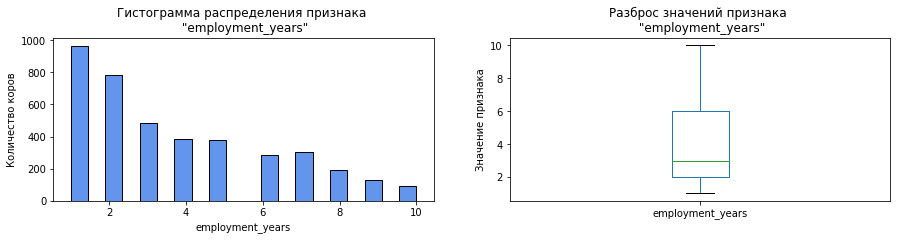

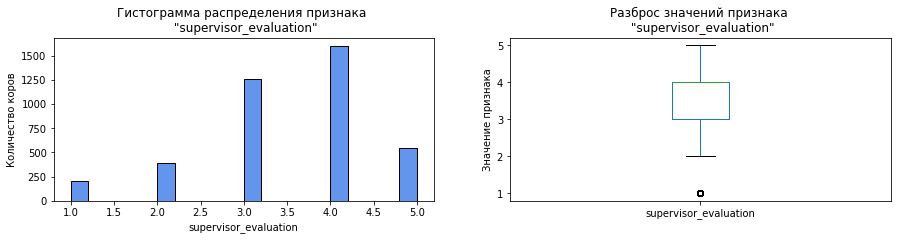

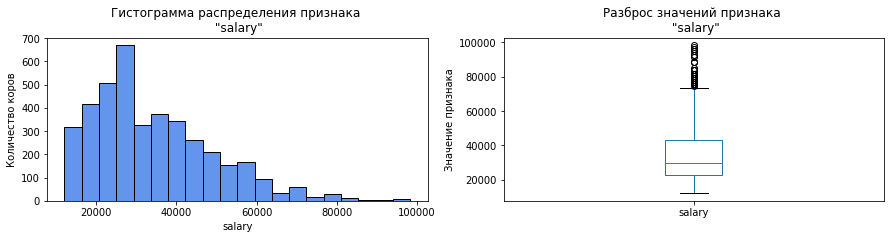

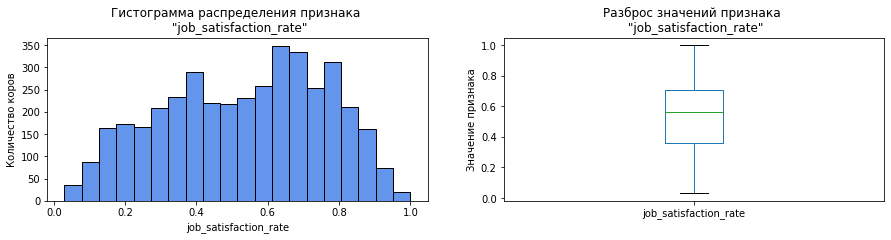

In [15]:
#количественные признаки
num_col = ['employment_years', 'supervisor_evaluation', 
               'salary', 'job_satisfaction_rate']

#построение гистограмм и боксплотов
graph_num_var(train_job_satisfaction_rate, num_col)

In [16]:
#выполним обзор данных для выбора количественных и качественных признаков
test_features.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [17]:
#вывод описательных статистик
test_features.set_index('id').describe()

,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000
mean,3.666500,3.526500,34066.800000
std,2.537222,0.996892,15398.436729
min,1.000000,1.000000,12000.000000
25%,1.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


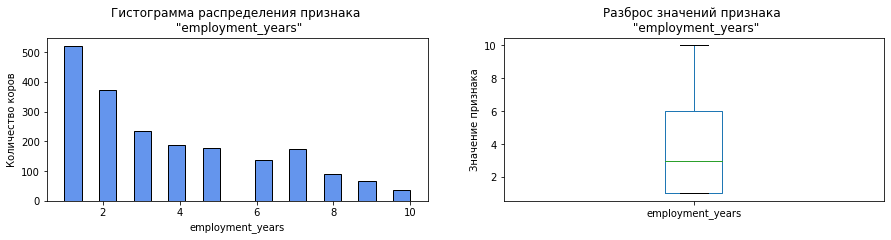

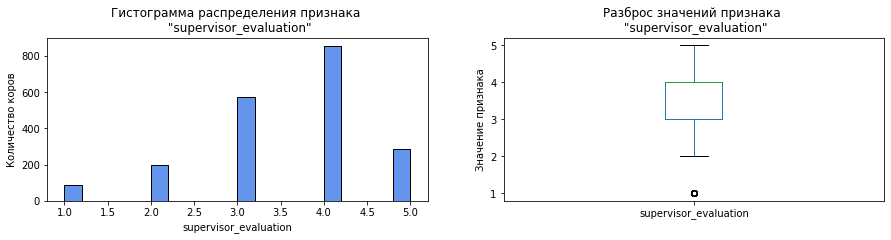

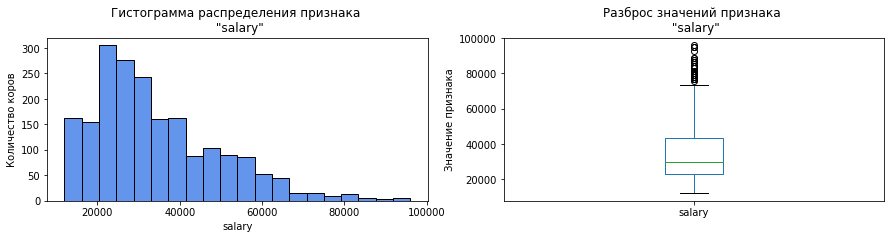

In [18]:
#количественные признаки
num_col = ['employment_years', 'supervisor_evaluation', 
               'salary']

#построение гистограмм и боксплотов
graph_num_var(test_features, num_col)

In [19]:
#выполним обзор данных для выбора количественных и качественных признаков
test_target_job_satisfaction_rate.head()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


In [20]:
#вывод описательных статистик
test_target_job_satisfaction_rate.set_index('id').describe()

,job_satisfaction_rate
count,2000.00000
mean,0.54878
std,0.22011
min,0.03000
25%,0.38000
50%,0.58000
75%,0.72000
max,1.00000


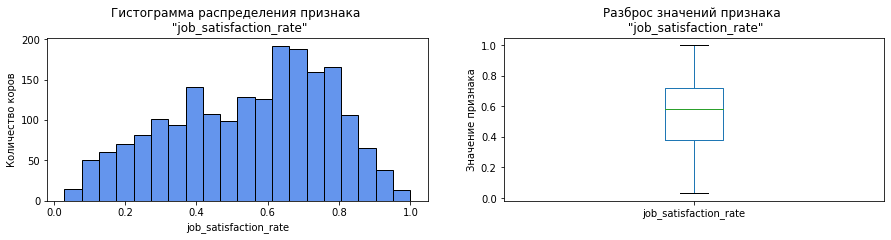

In [21]:
#количественные признаки
num_col = ['job_satisfaction_rate']

#построение гистограмм и боксплотов
graph_num_var(test_target_job_satisfaction_rate, num_col)

#### Анализ качественных переменных

In [22]:
#функция для вывода количества по каждому типу категориальных переменных
#и для построения круговых диаграмм
def graph_cat_var(data, col_names):
    for i in range (len(col_names)):
        print(data.groupby(col_names[i]).size(), '\n')
        
    fig, axes = plt.subplots(nrows=1, ncols=len(col_names), figsize=(24, 2.5))
    colors = sns.color_palette('coolwarm')[0:7]

    for i in range (len(col_names)):
        #если признаков больше 1
        if len(col_names)> 1:
            data.groupby(col_names[i]).size().plot(kind='pie', subplots=True, figsize=(8, 8), colors = colors, 
                                                   autopct='%1.1f%%', ax=axes[i], ylabel='', 
                                                   wedgeprops={'lw':0.9, 'ls':'--','edgecolor':"k"},)
            axes[i].set_title(f'Круговая диаграмма \n по признаку "{col_names[i]}"')
        #если признак 1
        elif len(col_names)==1:
            data.groupby(col_names[i]).size().plot(kind='pie', figsize=(4, 4), colors = colors, autopct='%1.1f%%', ylabel='', 
                                                   title=f'Круговая диаграмма \n по признаку "{col_names[i]}"',
                                                   wedgeprops={'lw':0.9, 'ls':'--','edgecolor':"k"},)
    plt.show()

dept
hr             456
marketing      550
purchasing     610
sales         1512
technology     866
dtype: int64 

level
junior    1894
middle    1744
sinior     358
dtype: int64 

workload
high       734
low       1200
medium    2066
dtype: int64 

last_year_promo
no     3880
yes     120
dtype: int64 

last_year_violations
no     3441
yes     559
dtype: int64 



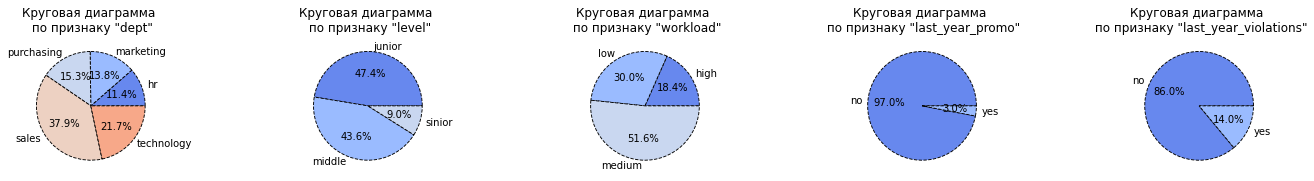

In [23]:
#категориальные переменные в датафрейме
cat_col = ['dept', 'level', 'workload', 
                       'last_year_promo', 'last_year_violations']
graph_cat_var(train_job_satisfaction_rate, cat_col)

dept
hr            227
marketing     279
purchasing    273
sales         763
technology    455
dtype: int64 

level
junior    974
middle    854
sinior    171
dtype: int64 

workload
             1
high       363
low        593
medium    1043
dtype: int64 

last_year_promo
no     1937
yes      63
dtype: int64 

last_year_violations
no     1738
yes     262
dtype: int64 



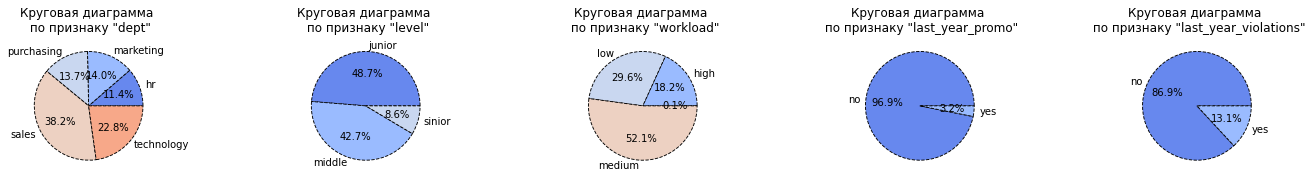

In [24]:
graph_cat_var(test_features, cat_col)

#### Корреляционный анализ

Проведем корреляционный анализ признаков в количественной шкале. Сделаем выводы о мультиколлинеарности и при необходимости устраним её.

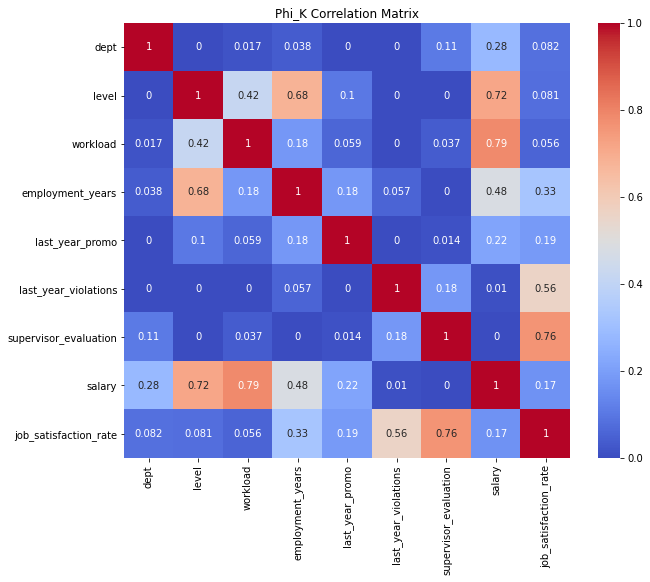

In [25]:
#вычислим матрицы корреляции с использованием phik
corr_matrix = train_job_satisfaction_rate.drop(['id'], axis=1).phik_matrix(interval_cols=['salary','job_satisfaction_rate'])

#визуализируем матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show()

**Выводы:**

- Анализ количественных переменных показал, что:
  - Длительность работы в компании (в годах) `employment_years` составляет от 1 до 10 лет. При этом наибольшее количество приходится на молодых сотрудников, работающих 1-3 года.
  - Оценка качества работы сотрудника, которую дал руководитель, `supervisor_evaluation` лежит в пределах от 1 до 5. Наиболее часто встречающиеся оценки - 4 и 3.
  - Ежемесячная зарплата сотрудника `salary` составляет от 10000 до 100000. При этом значения более 80000 встречаются редко, а медианное значение находится около 30000.
  - Уровень удовлетворённости сотрудника работой в компании, целевой признак `job_satisfaction_rate`, лежит в пределах от 0 до 1. При этом распределение признака близко к нормальному.
  
- Анализ категориальных переменных показал, что: 
  - Отделы `dept`, в которых работают сотрудники, по убиванию численности расположены следующим образом: sales, technology, purchasing, marketing, hr.
  - По уровню занимаемой должности `level` в компании наиболее распространены junior, практически такое же количество middle, в то время как senior составляет лишь около 9%.
  - Уровень загруженности `workload` у большинства сотрудников находится на уровне medium. Далее по распространенности идет low, затем high.
  - Анализ празнака `last_year_promo` показал, что у 97% сотрудников не было повышения за последний год.
  - Анализ признака `last_year_violations` показывает, что нарушали трудовой договор за последний год около 13-14% сотрудников.
  
- Корреляционный анализ показал умеренную связь у признаков `salary` и `level`, `salary` и `workload`, `level` и `employment_years`, `job_satisfaction_rate` и `supervisor_evaluation`. Однако данная связь не настолько сильна, чтобы избавляться от какого-либо из признаков при дальнейшем моделировании.

### Подготовка данных
Подготовку признаков выполним в пайплайне, дополнив пайплайн шага предобработки. При кодировании учитываем особенности признаков и моделей и используем как минимум два кодировщика.

In [26]:
train_job_satisfaction_rate.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [27]:
test_features.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [28]:
test_target_job_satisfaction_rate.head()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


Выполним проверку на дубликаты в датасете `train_job_satisfaction_rate`, убрав признак `id`.

In [29]:
#проверка на наличие явных дубликатов
print('Проверка на наличие явных дубликатов')
train_job_satisfaction_rate = train_job_satisfaction_rate.set_index('id')
print(train_job_satisfaction_rate.duplicated().sum())

Проверка на наличие явных дубликатов
245


In [30]:
#удалим дубликаты
train_job_satisfaction_rate = train_job_satisfaction_rate.drop_duplicates()
train_job_satisfaction_rate = train_job_satisfaction_rate.reset_index()
train_job_satisfaction_rate.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


In [31]:
X_train = train_job_satisfaction_rate.drop(columns=['id', 'job_satisfaction_rate'], axis=1)
y_train = train_job_satisfaction_rate['job_satisfaction_rate']

#объединим таблицы, чтобы сопоставить id для выделения X_test и y_test
data = test_features.merge(test_target_job_satisfaction_rate, on='id')
data.head()

X_test = data.drop(columns=['id', 'job_satisfaction_rate'], axis=1)
y_test = data['job_satisfaction_rate']

In [32]:
X_train.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,sales,junior,medium,2,no,no,1,24000
1,hr,junior,high,2,no,no,5,38400
2,sales,junior,low,1,no,no,2,12000
3,technology,junior,low,4,no,no,2,18000
4,hr,junior,medium,1,no,no,3,22800


In [33]:
# создадим списки с названиями признаков

#строковые категории
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']

#строковые категории для Ordinal Encoder
ord_columns = ['level', 'workload']

#количественные признаки
num_columns = ['employment_years', 'salary', 'supervisor_evaluation'] 

In [34]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False),
        )
    ]
)

# cоздаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['medium', 'high', 'low']
                ], 
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

print(data_preprocessor)

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('simpleImputer_ohe',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['dept', 'last_year_promo',
                                  'last_year_violations']),
                                ('ord',
                                 Pipeline(steps=[('simpleImputer_before_ord',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ord',
                                                  Ord

In [35]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final= Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
    ]
)
print(pipe_final)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(s

### Обучение моделей
Обучите как минимум две модели. Возьмите одну линейную модель, а в качестве второй — дерево решений. Подберите гиперпараметры как минимум для одной модели с помощью одного из известных вам инструментов. Выберите лучшую модель и проверьте её качество. Выбор делайте на основе новой метрики — SMAPE (англ. symmetric mean absolute percentage error, «симметричное среднее абсолютное процентное отклонение»). 

In [36]:
param_grid = [
     # словарь для модели DecisionTreeRegressor()
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(1, 50),
        'models__min_samples_split': range(1, 50),
        'models__min_samples_leaf': range(1, 50),
        'models__max_features': range(1, 50),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    
    # словарь для модели LinearRegression() 
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']   
    },
    
    # словарь для модели PolynomialFeatures() 
    {
        'models': [PolynomialFeatures()],
        'models__degree': range(1, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']   
    },
    
    # словарь для модели SVR()
    {
        'models': [SVR()],
        'models__kernel': ['linear', 'rbf', 'sigmoid'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    }
]

In [37]:
#создадим функцию для расчета метрики SMAPE
def smape_score(y_true, y_pred):
    return 1/len(y_true) * np.sum(2*np.abs(y_pred-y_true)/(np.abs(y_true)+np.abs(y_pred))*100)

scorer = make_scorer(smape_score, greater_is_better=False)

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=20,
    scoring=scorer,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=20,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pi...
                                         'models__degree': range(1, 20),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               RobustScaler(),
                                                               'passthrough']},
                                        {'models': [SVR()],
                                         'models__kernel': ['linear', 'rbf',
                                                            'sigmoid'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               RobustScaler(),
                                                               'passthrough']}],
                   random_state=42,
                   scoring=make_scorer(smape_score, greater_is_better=False, response_method='predict'))

In [38]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели при кросс-валидации:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

In [39]:
y_pred = randomized_search.predict(X_test)
y_pred

array([0.84571429, 0.67666667, 0.68375   , ..., 0.2       , 0.51857143,
       0.607     ])

In [40]:
print ('Метрика лучшей модели на тестовой выборке:', smape_score(y_test, y_pred))

Метрика лучшей модели на тестовой выборке: 13.722192102638783


**Вывод:**

- Предобработка данных и подготовка признаков была выполнена в пайплайне. Во время подготовки данных был использован ColumnTransformer.  При кодировании были учтены особенности признаков и моделей, использованы кодировщики OneHotEncoder, OrdinalEncoder, MinMaxScaler. Количественные и категориальные признаки были обработаны в пайплайне раздельно.
- Было обучено четыре модели: DecisionTreeRegressor(), LinearRegression(), PolynomialFeatures() и  SVR(), для котрых подбирались гиперпараметры.
- В качестве метрики качества была выбрана SMAPE. SMAPE является полезной метрикой для оценки точности прогнозов, поскольку она симметрично учитывает как переоценку, так и недооценку, предлагая более сбалансированную меру ошибки по сравнению с другими метриками.
- По результатам была выбрана лучшая модель: DecisionTreeRegressor(max_depth=45, max_features=40, min_samples_leaf=6, min_samples_split=8, random_state=42) со значением метрики SMAPE = 13.7 на тестовых данных.

### Выводы

- Был выполнен обзор и предобработка данных `train_job_satisfaction_rate`, `test_features`, `test_target_job_satisfaction_rate`. Все данные имеют корректные типы. Явные дубликаты устранены. В данных присутствуют пропуски.
- Анализ количественных переменных показал, что:
  - Длительность работы в компании (в годах) `employment_years` составляет от 1 до 10 лет. При этом наибольшее количество приходится на молодых сотрудников, работающих 1-3 года.
  - Оценка качества работы сотрудника, которую дал руководитель, `supervisor_evaluation` лежит в пределах от 1 до 5. Наиболее часто встречающиеся оценки - 4 и 3.
  - Ежемесячная зарплата сотрудника `salary` составляет от 10000 до 100000. При этом значения более 80000 встречаются редко, а медианное значение находится около 30000.
  - Уровень удовлетворённости сотрудника работой в компании, целевой признак `job_satisfaction_rate`, лежит в пределах от 0 до 1. При этом распределение признака близко к нормальному.
  
- Анализ категориальных переменных показал, что: 
  - Отделы `dept`, в которых работают сотрудники, по убиванию численности расположены следующим образом: sales, technology, purchasing, marketing, hr.
  - По уровню занимаемой должности `level` в компании наиболее распространены junior, практически такое же количество middle, в то время как senior составляет лишь около 9%.
  - Уровень загруженности `workload` у большинства сотрудников находится на уровне medium. Далее по распространенности идет low, затем high.
  - Анализ празнака `last_year_promo` показал, что у 97% сотрудников не было повышения за последний год.
  - Анализ признака `last_year_violations` показывает, что нарушали трудовой договор за последний год около 13-14% сотрудников.
  
- Корреляционный анализ показал умеренную связь у признаков `salary` и `level`, `salary` и `workload`, `level` и `employment_years`, `job_satisfaction_rate` и `supervisor_evaluation`. Однако данная связь не настолько сильна, чтобы избавляться от какого-либо из признаков при дальнейшем моделировании.

- Предобработка данных и подготовка признаков была выполнена в пайплайне. Во время подготовки данных был использован ColumnTransformer.  При кодировании были учтены особенности признаков и моделей, использованы кодировщики OneHotEncoder, OrdinalEncoder, MinMaxScaler. Количественные и категориальные признаки были обработаны в пайплайне раздельно.
- Было обучено четыре модели: DecisionTreeRegressor(), LinearRegression(), PolynomialFeatures() и  SVR(), для котрых подбирались гиперпараметры.
- В качестве метрики качества была выбрана SMAPE. SMAPE является полезной метрикой для оценки точности прогнозов, поскольку она симметрично учитывает как переоценку, так и недооценку, предлагая более сбалансированную меру ошибки по сравнению с другими метриками.
- По результатам была выбрана лучшая модель: DecisionTreeRegressor(max_depth=13, max_features=8, min_samples_leaf=3, min_samples_split=7, random_state=42) со значением метрики SMAPE = 13.7 на тренировочных данных.

## Задача 2: предсказание увольнения сотрудника из компании

### Загрузка данных

Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы.

In [41]:
pth1=['/Users/margarita/Desktop/datasets/train_quit.csv', 
      '/Users/margarita/Desktop/datasets/test_features.csv', 
      '/Users/margarita/Desktop/datasets/test_target_quit.csv']

pth2=['/datasets/train_quit.csv', 
      '/datasets/test_features.csv', 
      '/datasets/test_target_quit.csv']

if os.path.exists(pth1[0]):
    train_quit = pd.read_csv(pth1[0], sep=',')
elif os.path.exists(pth2[0]):
    train_quit = pd.read_csv(pth2[0], sep=',')
else:
    print('Something is wrong in train_quit')

if os.path.exists(pth1[1]):
    test_features = pd.read_csv(pth1[1], sep=',')
elif os.path.exists(pth2[1]):
    test_features = pd.read_csv(pth2[1], sep=',')
else:
    print('Something is wrong in test_features')

if os.path.exists(pth1[2]):
    test_target_quit = pd.read_csv(pth1[2], sep=',')
elif os.path.exists(pth2[2]):
    test_target_quit = pd.read_csv(pth2[2], sep=',')
else:
    print('Something is wrong in test_target_quit')

In [42]:
data_view(train_quit)

Вывод первых пяти строк датафрейма:



,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no




Размер датафрейма:


(4000, 10)



Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


In [43]:
data_view(test_features)

Вывод первых пяти строк датафрейма:



,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800




Размер датафрейма:


(2000, 9)



Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [44]:
data_view(test_target_quit)

Вывод первых пяти строк датафрейма:



,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes




Размер датафрейма:


(2000, 2)



Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


### Предобработка данных
Изучите данные и при необходимости выполните предобработку. Если есть пропуски, заполните их в пайплайне.

In [45]:
#используем функцию для проверки на пропуски и уникальные значения
gap_duplicates(train_quit)

Проверка на наличие пропусков
id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64


Проверка на наличие явных дубликатов
0


Проверка на наличие неявных дубликатов
id
[723290 814010 155091 ... 536432 692133 853842]
dept
['sales' 'purchasing' 'marketing' 'technology' 'hr']
level
['middle' 'junior' 'sinior']
workload
['high' 'medium' 'low']
employment_years
[ 2  5  1  8  4  7  3  9  6 10]
last_year_promo
['no' 'yes']
last_year_violations
['no' 'yes']
supervisor_evaluation
[4 1 3 5 2]
salary
[54000 27600 37200 24000 25200 18000 44400 19200 45600 57600 33600 16800
 22800 26400 82800 32400 39600 30000 46800 12000 15600 58800 60000 66000
 21600 38400 62400 40800 56400 34800 28800 52800 20400 36000 61200 48000
 43200 73200 31200 78000 64800 72000 94800 96000 63600 7

In [46]:
gap_duplicates(test_features)

Проверка на наличие пропусков
id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64


Проверка на наличие явных дубликатов
0


Проверка на наличие неявных дубликатов
id
[485046 686555 467458 ... 305653 160233 771859]
dept
['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
level
['junior' 'middle' 'sinior' nan]
workload
['medium' 'low' 'high' ' ']
employment_years
[ 2  1  5  6  3  9  7  4  8 10]
last_year_promo
['no' 'yes']
last_year_violations
['no' 'yes']
supervisor_evaluation
[5 4 3 1 2]
salary
[28800 30000 19200 40800 42000 26400 49200 62400 14400 36000 33600 44400
 27600 12000 64800 20400 34800 15600 18000 50400 31200 51600 16800 43200
 52800 32400 37200 58800 24000 21600 48000 45600 25200 63600 61200 56400
 38400 46800 55200 13200 39600 54000 57600 68400 22800 72000 81600 

In [47]:
gap_duplicates(test_target_quit)

Проверка на наличие пропусков
id      0
quit    0
dtype: int64


Проверка на наличие явных дубликатов
0


Проверка на наличие неявных дубликатов
id
[999029 372846 726767 ... 746018 247658 460332]
quit
['yes' 'no']




In [48]:
#заменим один из обнаруженных пробелов на пропуск
test_features['dept'] = test_features['dept'].replace(' ', float('NaN'))

**Выводы:**

Был выполнен обзор и предобработка данных. Все данные имеют корректные типы. Явных дубликатов не обнаружено. В данных присутствуют пропуски, заполним позже их в пайплайне.

### Исследовательский анализ данных
  - Проведите исследовательский анализ данных.
  - Составьте портрет «уволившегося сотрудника». Например, можно узнать, в каком отделе с большей вероятностью работает уволившийся сотрудник и какой у него уровень загруженности. Также можно сравнить среднее значение зарплаты ушедших сотрудников с теми, кто остался в компании.
  - Аналитики утверждают, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Проверьте это утверждение: визуализируйте и сравните распределения признака job_satisfaction_rate для ушедших и оставшихся сотрудников. Используйте данные с обоими целевыми признаками тестовой выборки.

#### Анализ количественных признаков

In [49]:
#выполним обзор данных для выбора количественных и качественных признаков
train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [50]:
#вывод описательных статистик
train_quit.set_index('id').describe()

,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000
mean,3.701500,3.474750,33805.800000
std,2.541852,1.004049,15152.415163
min,1.000000,1.000000,12000.000000
25%,2.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


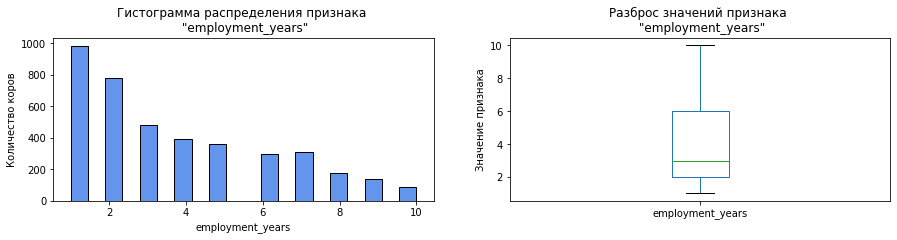

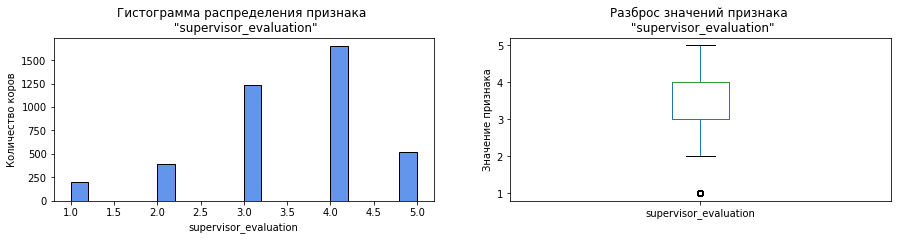

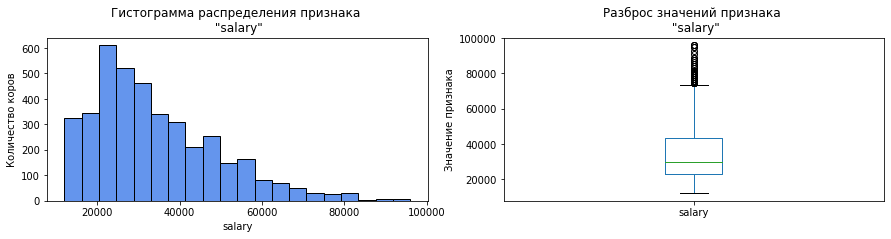

In [51]:
#количественные признаки
num_col = ['employment_years', 'supervisor_evaluation', 
               'salary']

#построение гистограмм и боксплотов
graph_num_var(train_quit, num_col)

In [52]:
#выполним обзор данных для выбора количественных и качественных признаков
test_features.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


In [53]:
#вывод описательных статистик
test_features.set_index('id').describe()

,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000
mean,3.666500,3.526500,34066.800000
std,2.537222,0.996892,15398.436729
min,1.000000,1.000000,12000.000000
25%,1.000000,3.000000,22800.000000
50%,3.000000,4.000000,30000.000000
75%,6.000000,4.000000,43200.000000
max,10.000000,5.000000,96000.000000


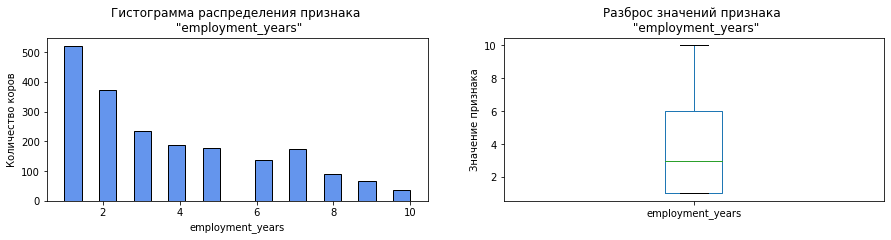

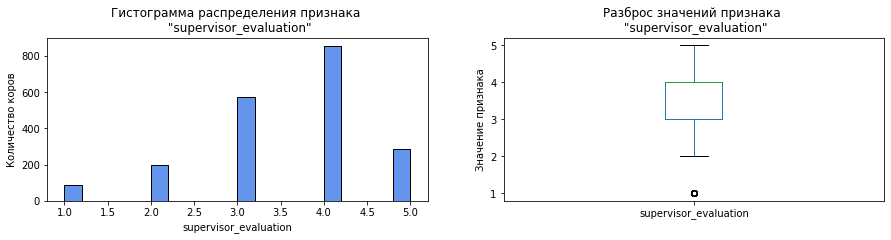

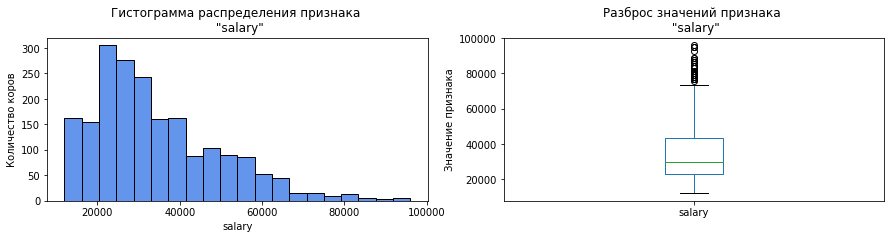

In [54]:
#количественные признаки
num_col = ['employment_years', 'supervisor_evaluation', 
               'salary']

#построение гистограмм и боксплотов
graph_num_var(test_features, num_col)

In [55]:
#выполним обзор данных для выбора количественных и качественных признаков
test_target_quit.head()

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


#### Анализ качественных признаков

dept
hr             464
marketing      582
purchasing     588
sales         1438
technology     928
dtype: int64 

level
junior    1949
middle    1694
sinior     357
dtype: int64 

workload
high       674
low       1208
medium    2118
dtype: int64 

last_year_promo
no     3887
yes     113
dtype: int64 

last_year_violations
no     3455
yes     545
dtype: int64 

quit
no     2872
yes    1128
dtype: int64 



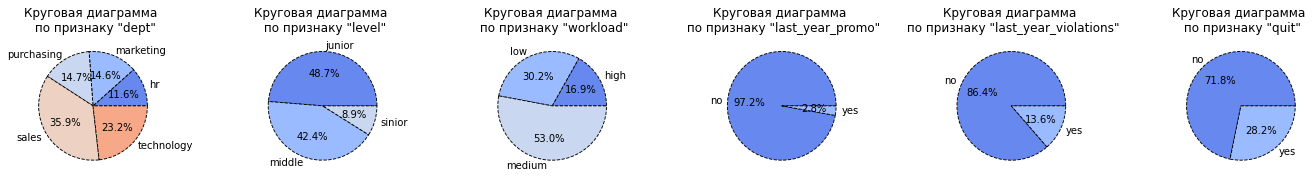

In [56]:
#категориальные переменные в датафрейме
cat_col = ['dept', 'level', 'workload', 
                       'last_year_promo', 'last_year_violations', 'quit']
graph_cat_var(train_quit, cat_col)

dept
hr            227
marketing     279
purchasing    273
sales         763
technology    455
dtype: int64 

level
junior    974
middle    854
sinior    171
dtype: int64 

workload
             1
high       363
low        593
medium    1043
dtype: int64 

last_year_promo
no     1937
yes      63
dtype: int64 

last_year_violations
no     1738
yes     262
dtype: int64 



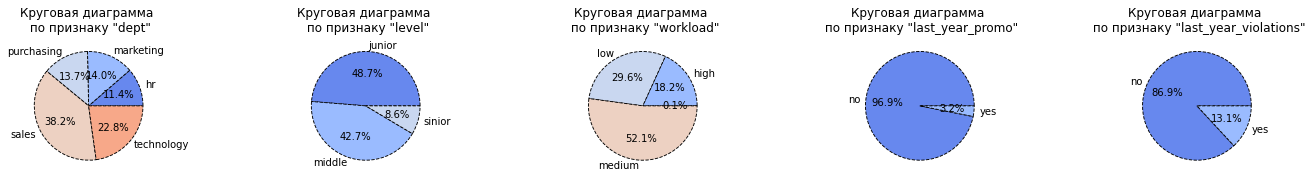

In [57]:
#категориальные переменные в датафрейме
cat_col = ['dept', 'level', 'workload', 
                       'last_year_promo', 'last_year_violations']
graph_cat_var(test_features, cat_col)

quit
no     1436
yes     564
dtype: int64 



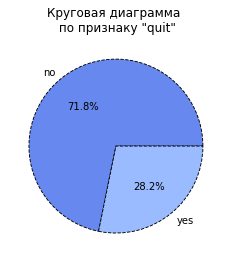

In [58]:
#категориальные переменные в датафрейме
cat_col = ['quit']
graph_cat_var(test_target_quit, cat_col)

#### Корреляционный анализ

Проведем корреляционный анализ признаков в количественной шкале. Сделаем выводы о мультиколлинеарности и при необходимости устраним её.

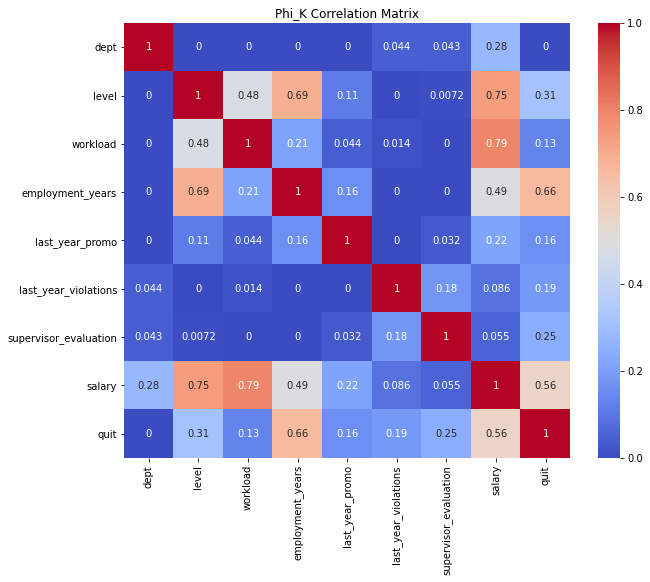

In [59]:
#вычислим матрицы корреляции с использованием phik
corr_matrix = train_quit.drop(['id'], axis=1).phik_matrix(interval_cols=['salary'])

#визуализируем матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show()

#### Портрет «уволившегося сотрудника»

Составим портрер уволившегося сотрудника.

Узнаем, в каком отделе с большей вероятностью работает уволившийся сотрудник.

dept
hr            116
marketing     163
purchasing    166
sales         407
technology    276
dtype: int64 



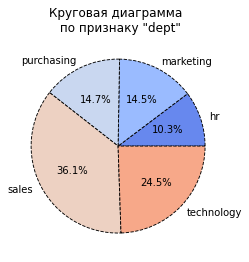

In [60]:
graph_cat_var(train_quit.loc[train_quit['quit']=='yes'], ['dept'])

Узнаем, какой уровень загруженности у уволившегося сотрудника.

workload
high      121
low       519
medium    488
dtype: int64 



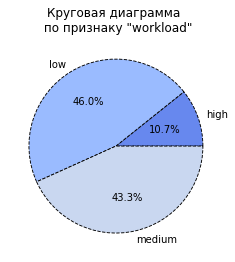

In [61]:
graph_cat_var(train_quit.loc[train_quit['quit']=='yes'], ['workload'])

Узнаем, какой уровень занимаемой должности у уволившегося сотрудника.

level
junior    1003
middle     108
sinior      17
dtype: int64 



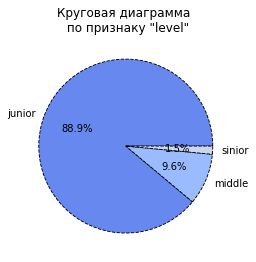

In [62]:
graph_cat_var(train_quit.loc[train_quit['quit']=='yes'], ['level'])

Сравним среднее значение зарплаты ушедших сотрудников с теми, кто остался в компании.

Среднее значение зарплаты ушедших сотрудников: 23885.11
Среднее значение зарплаты тех, кто остался в компании: 37702.23
Отношения средних зарплат: 1.58


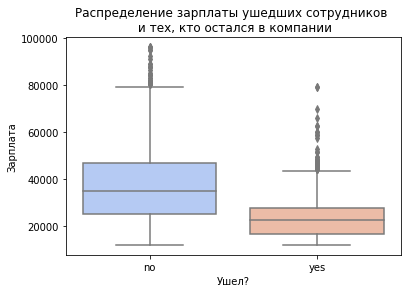

In [63]:
print('Среднее значение зарплаты ушедших сотрудников:', train_quit.loc[train_quit['quit']=='yes']['salary'].mean().round(2))
print('Среднее значение зарплаты тех, кто остался в компании:', train_quit.loc[train_quit['quit']=='no']['salary'].mean().round(2))
print('Отношения средних зарплат:', (train_quit.loc[train_quit['quit']=='no']['salary'].mean()/train_quit.loc[train_quit['quit']=='yes']['salary'].mean()).round(2))

sns.boxplot(y='salary', x='quit', data = train_quit, palette='coolwarm')
plt.title('Распределение зарплаты ушедших сотрудников \n и тех, кто остался в компании')
plt.xlabel(f'Ушел?')
plt.ylabel('Зарплата')
plt.show()

**Вывод:**
Был составлен портрет «уволившегося сотрудника». Наибольшее количество уволившихся сотрудников работают в отделах sales и technology (60.6%). Уровень загруженности у большинства уволившихся сотрудников medium или low (89.3%). Уровень занимаемой должности у 88.9% - junior. Среднее значение зарплаты ушедших сотрудников в 1.5 раза меньше, чем у тех, кто остался в компании. Среднее значение зарплаты ушедших сотрудников составляет 23885.11, у тех, кто остался в компании - 37702.23.

#### Анализ признака `job_satisfaction_rate`

Аналитики утверждают, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Проверим это утверждение: визуализируем и сравним распределения признака `job_satisfaction_rate` для ушедших и оставшихся сотрудников. Используем данные с обоими целевыми признаками тестовой выборки.

In [64]:
#объединим таблицы
data = test_features.merge(test_target_job_satisfaction_rate, on='id').merge(test_target_quit, on='id')
data.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
0,485046,marketing,junior,medium,2,no,no,5,28800,0.79,no
1,686555,hr,junior,medium,1,no,no,4,30000,0.72,no
2,467458,sales,middle,low,5,no,no,4,19200,0.64,no
3,418655,sales,middle,low,6,no,no,4,19200,0.60,no
4,789145,hr,middle,medium,5,no,no,5,40800,0.75,no


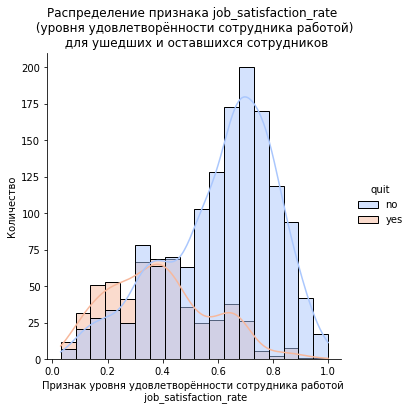

In [65]:
sns.displot(data, x = 'job_satisfaction_rate', hue = 'quit', 
            kde=True, fill = True,
            palette='coolwarm')
plt.xlabel('Признак уровня удовлетворённости сотрудника работой \n job_satisfaction_rate')
plt.ylabel('Количество')
plt.title('Распределение признака job_satisfaction_rate \n (уровня удовлетворённости сотрудника работой) \n для ушедших и оставшихся сотрудников')
plt.show()

**Вывод:**

Было установлено, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Чем выше уровень удовлетворённости сотрудника работой, тем ниже вероятность, что сотрудник уволится.

### Добавление нового входного признака
Установлено, что `job_satisfaction_rate` и `quit` действительно связаны. Тогда добавим `job_satisfaction_rate`, предсказанный лучшей моделью первой задачи, к входным признакам второй задачи.

Выполним проверку на дубликаты в датасете `train_quit`, убрав признак `id`.

In [66]:
#проверка на наличие явных дубликатов
print('Проверка на наличие явных дубликатов')
train_quit = train_quit.set_index('id')
print(train_quit.duplicated().sum())

Проверка на наличие явных дубликатов
1413


In [67]:
#удалим дубликаты
train_quit = train_quit.drop_duplicates()
train_quit = train_quit.reset_index()
train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [68]:
#создадим X_train, X_test, y_train, y_test
X_train = train_quit.drop(columns=['id', 'quit'], axis=1)
y_train = train_quit['quit']
X_test = data.drop(columns=['id', 'quit'], axis=1)
y_test = data['quit']

In [69]:
#сохраняем лучшую модель из задачи 1
pipe_best_model = randomized_search.best_estimator_

#получим уровень удовлетворенности для входных признаков второй задачи
job_satisfaction_rate_new = pipe_best_model.predict(X_train)
job_satisfaction_rate_new

array([0.65222222, 0.838     , 0.35111111, ..., 0.51416667, 0.54428571,
       0.50375   ])

In [70]:
job_satisfaction_rate_new = pd.DataFrame(job_satisfaction_rate_new, columns=['job_satisfaction_rate'])
job_satisfaction_rate_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2587 entries, 0 to 2586
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   job_satisfaction_rate  2587 non-null   float64
dtypes: float64(1)
memory usage: 20.3 KB


In [71]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2587 entries, 0 to 2586
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   2587 non-null   object
 1   level                  2587 non-null   object
 2   workload               2587 non-null   object
 3   employment_years       2587 non-null   int64 
 4   last_year_promo        2587 non-null   object
 5   last_year_violations   2587 non-null   object
 6   supervisor_evaluation  2587 non-null   int64 
 7   salary                 2587 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 161.8+ KB


In [72]:
#присоединим к входным данным второй задачи признак job_satisfaction_rate
X_train = X_train.join(job_satisfaction_rate_new)
X_train.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,sales,middle,high,2,no,no,4,54000,0.652222
1,sales,junior,medium,2,no,no,4,27600,0.838000
2,purchasing,middle,medium,5,no,no,1,37200,0.351111
3,sales,junior,medium,2,no,yes,3,24000,0.340000
4,marketing,junior,medium,2,no,no,5,25200,0.791667


### Подготовка данных
Подготовьте признаки так же, как и в первой задаче: выполните подготовку в пайплайне, дополнив пайплайн предобработки. При кодировании учитывайте особенности признаков и моделей и используйте как минимум два кодировщика.

In [73]:
# создадим списки с названиями признаков

#строковые категории
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']

#строковые категории для Ordinal Encoder
ord_columns = ['level', 'workload']

#количественные признаки
num_columns = ['employment_years', 'salary', 'supervisor_evaluation', 'job_satisfaction_rate'] 

In [74]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False),
        )
    ]
)

# cоздаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['medium', 'high', 'low']
                ], 
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

print(data_preprocessor)

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('simpleImputer_ohe',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['dept', 'last_year_promo',
                                  'last_year_violations']),
                                ('ord',
                                 Pipeline(steps=[('simpleImputer_before_ord',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ord',
                                                  Ord

In [75]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final= Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)
print(pipe_final)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(s

### Обучение модели
Обучите как минимум три модели. Как минимум для двух из них подберите гиперпараметры. Проверьте качество лучшей модели. Метрика оценки качества в этой задаче — ROC-AUC. Критерий успеха: ROC-AUC ≥ 0.91 на тестовой выборке. Напомним: отбор признаков часто помогает улучшить метрику.

In [76]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(1, 50),
        'models__min_samples_split': range(1, 50),
        'models__min_samples_leaf': range(1, 50),
        'models__max_features': range(1, 50),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },

    # словарь для модели SVC
    {
        'models': [SVC(
            random_state=RANDOM_STATE, probability= True
        )],
        'models__kernel': ['linear', 'rbf', 'sigmoid'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pip...
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': range(1, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               RobustScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(probability=True,
                                                        random_state=42)],
                                         'models__kernel': ['linear', 'rbf',
                                                            'sigmoid'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               RobustScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [77]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

In [78]:
y_pred = randomized_search.predict(X_test)
y_pred

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [79]:
y_pred_proba = randomized_search.predict_proba(X_test)
y_pred_proba

array([[0.91891892, 0.08108108],
       [0.73529412, 0.26470588],
       [0.9516129 , 0.0483871 ],
       ...,
       [0.04848485, 0.95151515],
       [0.9047619 , 0.0952381 ],
       [0.875     , 0.125     ]])

In [80]:
y_test

0        no
1        no
2        no
3        no
4        no
       ... 
1995    yes
1996    yes
1997    yes
1998     no
1999     no
Name: quit, Length: 2000, dtype: object

In [81]:
#используе кодировщик для возможности расчета ROC-AUC
encoder = LabelEncoder()
y_pred_encoder = encoder.fit_transform(y_pred)
y_test_encoder = encoder.transform(y_test)
encoder.classes_
y_test_encoder

array([0, 0, 0, ..., 1, 0, 0])

In [82]:
print ('Метрика ROC-AUC лучшей модели на тестовой выборке:', roc_auc_score(y_test_encoder, y_pred_proba[:,1]))

Метрика ROC-AUC лучшей модели на тестовой выборке: 0.9230760682747585


**Вывод:**
- Предобработка данных и подготовка признаков была выполнена в пайплайне. Во время подготовки данных был использован ColumnTransformer. При кодировании были учтены особенности признаков и моделей, использованы кодировщики OneHotEncoder, OrdinalEncoder, MinMaxScaler. Количественные и категориальные признаки были обработаны в пайплайне раздельно.
- Было обучено четыре модели: DecisionTreeClassifier(), LogisticRegression(), KNeighborsClassifier() и SVC(), для котрых подбирались гиперпараметры.
- В качестве метрики качества была выбрана ROC-AUC. 
- По результатам была выбрана лучшая модель: DecisionTreeClassifier(max_depth=5, max_features=37, min_samples_leaf=33, min_samples_split=23, random_state=42) со значением метрики ROC-AUC = 0.92 на тестовых данных.

### Выводы

- Был выполнен обзор и предобработка данных. Все данные имеют корректные типы. Явные дубликаты устранены. В данных присутствуют пропуски, заполним позже их в пайплайне.
- Был составлен портрет «уволившегося сотрудника». Наибольшее количество уволившихся сотрудников работают в отделах sales и technology (60.6%). Уровень загруженности у большинства уволившихся сотрудников medium или low (89.3%). Уровень занимаемой должности у 88.9% - junior. Среднее значение зарплаты ушедших сотрудников в 1.5 раза меньше, чем у тех, кто остался в компании. Среднее значение зарплаты ушедших сотрудников составляет 23885.11, у тех, кто остался в компании - 37702.23.
- Было установлено, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Чем выше уровень удовлетворённости сотрудника работой, тем ниже вероятность, что сотрудник уволится.
- Предобработка данных и подготовка признаков была выполнена в пайплайне. Во время подготовки данных был использован ColumnTransformer. При кодировании были учтены особенности признаков и моделей, использованы кодировщики OneHotEncoder, OrdinalEncoder, MinMaxScaler. Количественные и категориальные признаки были обработаны в пайплайне раздельно.
- Было обучено четыре модели: DecisionTreeClassifier(), LogisticRegression(), KNeighborsClassifier() и SVC(), для котрых подбирались гиперпараметры.
- В качестве метрики качества была выбрана ROC-AUC. 
- По результатам была выбрана лучшая модель: DecisionTreeClassifier(max_depth=5, max_features=37, min_samples_leaf=33, min_samples_split=23, random_state=42) со значением метрики ROC-AUC = 0.92 на тестовых данных.

## Выводы

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.
Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 
Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли. 

**Цель исследования:** 
- Задача 1: построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 
- Задача 2: построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.


**Задача 1: предсказание уровня удовлетворённости сотрудника**
- Был выполнен обзор и предобработка данных `train_job_satisfaction_rate`, `test_features`, `test_target_job_satisfaction_rate`. Все данные имеют корректные типы. Явные дубликаты устранены. В данных присутствуют пропуски.
- Анализ количественных переменных показал, что:
  - Длительность работы в компании (в годах) `employment_years` составляет от 1 до 10 лет. При этом наибольшее количество приходится на молодых сотрудников, работающих 1-3 года.
  - Оценка качества работы сотрудника, которую дал руководитель, `supervisor_evaluation` лежит в пределах от 1 до 5. Наиболее часто встречающиеся оценки - 4 и 3.
  - Ежемесячная зарплата сотрудника `salary` составляет от 10000 до 100000. При этом значения более 80000 встречаются редко, а медианное значение находится около 30000.
  - Уровень удовлетворённости сотрудника работой в компании, целевой признак `job_satisfaction_rate`, лежит в пределах от 0 до 1. При этом распределение признака близко к нормальному.
  
- Анализ категориальных переменных показал, что: 
  - Отделы `dept`, в которых работают сотрудники, по убиванию численности расположены следующим образом: sales, technology, purchasing, marketing, hr.
  - По уровню занимаемой должности `level` в компании наиболее распространены junior, практически такое же количество middle, в то время как senior составляет лишь около 9%.
  - Уровень загруженности `workload` у большинства сотрудников находится на уровне medium. Далее по распространенности идет low, затем high.
  - Анализ празнака `last_year_promo` показал, что у 97% сотрудников не было повышения за последний год.
  - Анализ признака `last_year_violations` показывает, что нарушали трудовой договор за последний год около 13-14% сотрудников.
  
- Корреляционный анализ показал умеренную связь у признаков `salary` и `level`, `salary` и `workload`, `level` и `employment_years`, `job_satisfaction_rate` и `supervisor_evaluation`. Однако данная связь не настолько сильна, чтобы избавляться от какого-либо из признаков при дальнейшем моделировании.

- Предобработка данных и подготовка признаков была выполнена в пайплайне. Во время подготовки данных был использован ColumnTransformer.  При кодировании были учтены особенности признаков и моделей, использованы кодировщики OneHotEncoder, OrdinalEncoder, MinMaxScaler. Количественные и категориальные признаки были обработаны в пайплайне раздельно.
- Было обучено четыре модели: DecisionTreeRegressor(), LinearRegression(), PolynomialFeatures() и  SVR(), для котрых подбирались гиперпараметры.
- В качестве метрики качества была выбрана SMAPE. SMAPE является полезной метрикой для оценки точности прогнозов, поскольку она симметрично учитывает как переоценку, так и недооценку, предлагая более сбалансированную меру ошибки по сравнению с другими метриками.
- По результатам была выбрана лучшая модель: DecisionTreeRegressor(max_depth=13, max_features=8, min_samples_leaf=3, min_samples_split=7, random_state=42) со значением метрики SMAPE = 13.7 на тренировочных данных.


**Задача 2: предсказание увольнения сотрудника из компании**
- Был выполнен обзор и предобработка данных. Все данные имеют корректные типы. Явные дубликаты устранены. В данных присутствуют пропуски, заполним позже их в пайплайне.
- Был составлен портрет «уволившегося сотрудника». Наибольшее количество уволившихся сотрудников работают в отделах sales и technology (60.6%). Уровень загруженности у большинства уволившихся сотрудников medium или low (89.3%). Уровень занимаемой должности у 88.9% - junior. Среднее значение зарплаты ушедших сотрудников в 1.5 раза меньше, чем у тех, кто остался в компании. Среднее значение зарплаты ушедших сотрудников составляет 23885.11, у тех, кто остался в компании - 37702.23.
- Было установлено, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Чем выше уровень удовлетворённости сотрудника работой, тем ниже вероятность, что сотрудник уволится.
- Предобработка данных и подготовка признаков была выполнена в пайплайне. Во время подготовки данных был использован ColumnTransformer. При кодировании были учтены особенности признаков и моделей, использованы кодировщики OneHotEncoder, OrdinalEncoder, MinMaxScaler. Количественные и категориальные признаки были обработаны в пайплайне раздельно.
- Было обучено четыре модели: DecisionTreeClassifier(), LogisticRegression(), KNeighborsClassifier() и SVC(), для котрых подбирались гиперпараметры.
- В качестве метрики качества была выбрана ROC-AUC. 
- По результатам была выбрана лучшая модель: DecisionTreeClassifier(max_depth=5, max_features=37, min_samples_leaf=33, min_samples_split=23, random_state=42) со значением метрики ROC-AUC = 0.92 на тестовых данных.


**Рекомендации бизнесу:**
- Было установлено, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Чем выше уровень удовлетворённости сотрудника работой, тем ниже вероятность, что сотрудник уволится. Необходимо регулярно проверять уровень удовлетворённости сотрудника работой и разработать способы влияния на этот факт для того, чтобы предупредить увольнение сотрудника.